<a href="https://www.kaggle.com/code/eminecansuakgul/weatherforecasting?scriptVersionId=119775100" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('/kaggle/input/istanbul-weather-forecasting/istanbul-weather-data.csv', usecols=['date', 'tavg'])

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['tavg'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size:, :]


In [3]:
# Convert the data into sequences
def create_sequences(dataset, lookback=1):
    X, y = [], []
    for i in range(len(dataset) - lookback):
        X.append(dataset[i:(i + lookback), 0])
        y.append(dataset[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 30  # Number of timesteps to look back
X_train, y_train = create_sequences(train_data, lookback)
X_test, y_test = create_sequences(test_data, lookback)

In [4]:
# Reshape the data into a 3D array for input into the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [5]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=64))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print('MSE:', mse)

Epoch 1/100
10/10 [==============================] - 6s 6ms/step - loss: 0.1332
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0211
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0173
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0146
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0109
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0102
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0091
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0092
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0087
Epoch 10/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0087
Epoch 11/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0086
Epoch 12/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0086
Epoch 13/100
10/10 [=================

In [6]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Invert the scaling
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


4/4 [==============================] - 1s 5ms/step


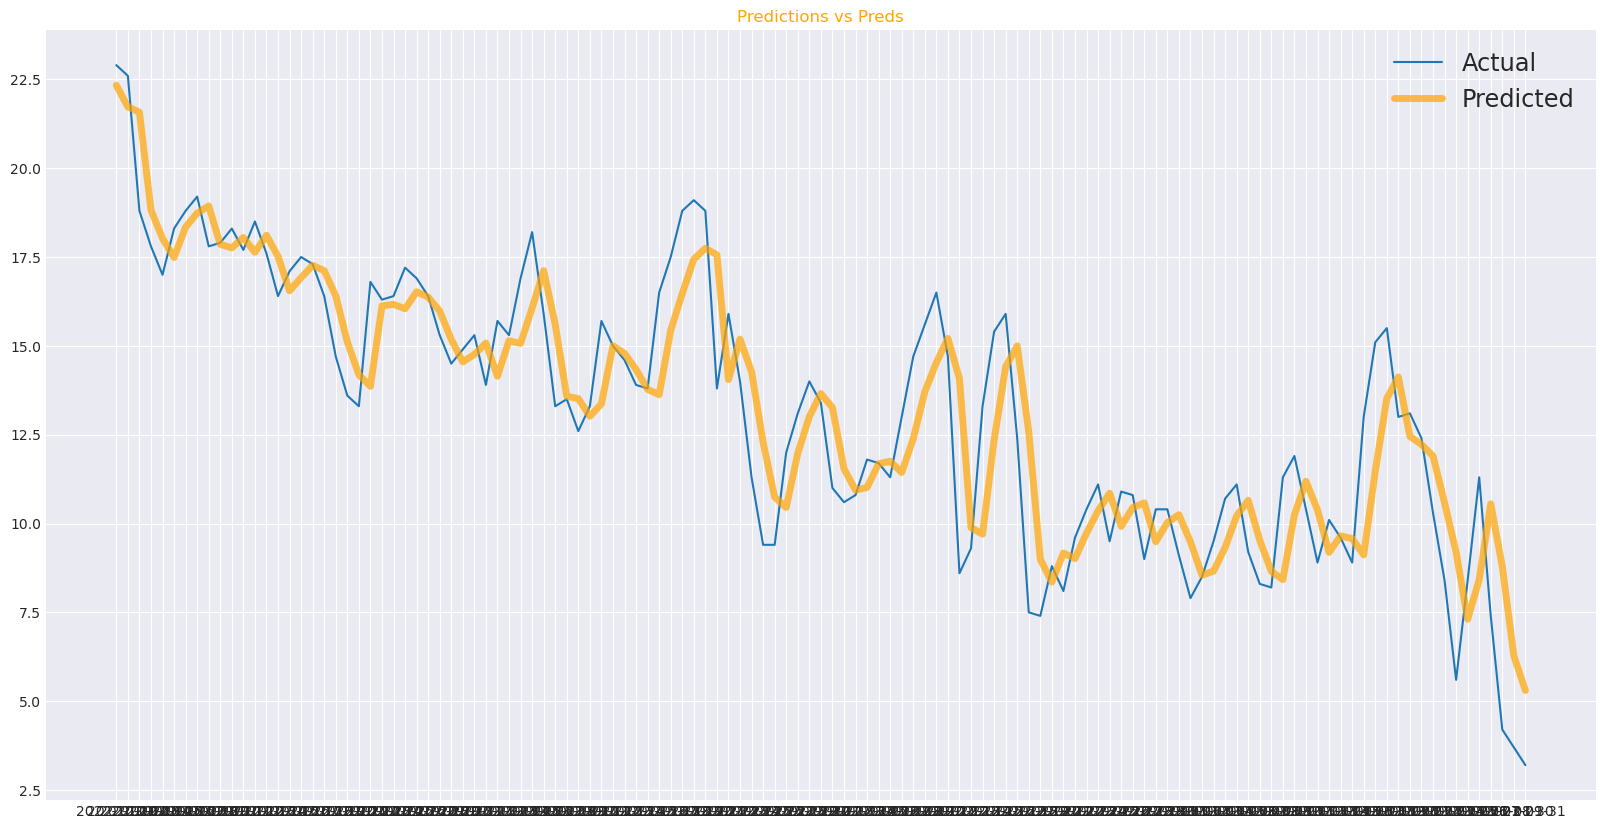

In [7]:
# Plot the predictions against the actual values
plt.figure(figsize=(20, 10))
plt.style.use('seaborn-darkgrid')
plt.plot(data.iloc[-123:,0],y_test, label='Actual')
plt.title("Predictions vs Preds", color='orange')
pd.date_range(start='2022-01-01', end='2022-01-31', freq='30D')
plt.plot(data.iloc[-123:, 0],predictions, label='Predicted',color='orange', linewidth=5,alpha=0.7)
plt.legend(fontsize='xx-large')
plt.show()
